#BSAN 6070 CA03 Decision Tree Algorithm
#Mfolozi Dlamini
#Feb 20, 2022

# Importing Modules

In [ ]:
#Importing modules-packages
import os
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import recall_score
from IPython.display import Image
import pydotplus
from google.colab import drive
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from IPython.display import Image
from google.colab import drive


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image
from google.colab import drive

# Reading the CSV file

In [ ]:
#Reading the csv file linked to the directory
url = 'https://github.com/ArinB/MSBA-CA-Data/blob/main/CA03/census_data.csv?raw=true'
data = pd.read_csv(url, encoding = "ISO-8859-1")

#**PART 1**

# 1. Data Inspection and Quality Analysis (DQA)

In [ ]:
# Descriptive statistics and first few rows
data.describe()

y
count  48842.000000
mean       0.239282
std        0.426649
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

In [ ]:
#first rows of the data
data.head()

hours_per_week_bin occupation_bin  msr_bin  ...            age_bin   flag  y
0           b. 31-40   b. Mid - Low   b. Mid  ...   d. 36-40 & 56-60  train  0
1            a. 0-30        e. High  c. High  ...           e. 40-55  train  0
2           b. 31-40         a. Low   b. Mid  ...   d. 36-40 & 56-60  train  0
3           b. 31-40         a. Low  c. High  ...           e. 40-55  train  0
4           b. 31-40        e. High  c. High  ...  b. 26-30 & 71-100  train  0

[5 rows x 11 columns]

In [ ]:
#Count of Rows
data.count()

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

In [ ]:
# data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [ ]:
# Check for duplicate records:
data.duplicated().sum()

40012

In [ ]:
#Cheking for Null Values
pd.isnull(data).sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

Descriptive Statistics For Each Column

In [ ]:
#Descriptive Statistics for #hours_per_week_bin
display("Counts: ",data.hours_per_week_bin.sort_index().value_counts())


#mode
display("Mode: ", data.hours_per_week_bin.mode())


#min
display("Min: ",data.hours_per_week_bin.min())


#max
display("Max: ",data.hours_per_week_bin.max())


'Counts: '

b. 31-40            26639
d. 41-50 & 61-70     9819
a. 0-30              7851
e. 51-60             3759
c. 71-100             774
Name: hours_per_week_bin, dtype: int64

'Mode: '

0    b. 31-40
dtype: object

'Min: '

'a. 0-30'

'Max: '

'e. 51-60'

In [ ]:
#Descriptive Statistics for #occupation_bin
display("Counts: ",data.occupation_bin.sort_index().value_counts())


#mode
display("Mode: ", data.occupation_bin.mode())


#min
display("Min: ", data.occupation_bin.min())


#max
display("Max: ", data.occupation_bin.max())


'Counts: '

c. Mid - Mid     13971
b. Mid - Low     12947
e. High          12258
a. Low            7237
d. Mid - High     2429
Name: occupation_bin, dtype: int64

'Mode: '

0    c. Mid - Mid
dtype: object

'Min: '

'a. Low'

'Max: '

'e. High'

In [ ]:
#Descriptive Statistics for #msr_bin
display("Counts: ",data.msr_bin.sort_index().value_counts())


#mode
display("Mode: ", data.msr_bin.mode())


#min
display("Min: ", data.msr_bin.min())


#max
display("Max: ", data.msr_bin.max())

'Counts: '

c. High    22047
b. Mid     15868
a. Low     10927
Name: msr_bin, dtype: int64

'Mode: '

0    c. High
dtype: object

'Min: '

'a. Low'

'Max: '

'c. High'

In [ ]:
#Descriptive Statistics for #capital_gl_bin
display("Counts: ",data.capital_gl_bin.sort_index().value_counts())


#mode
display("Mode: ", data.capital_gl_bin.mode())


#min
display("Min: ", data.capital_gl_bin.min())


#max
display("Max: ", data.capital_gl_bin.max())


'Counts: '

a. = 0    42525
c. > 0     4035
b. < 0     2282
Name: capital_gl_bin, dtype: int64

'Mode: '

0    a. = 0
dtype: object

'Min: '

'a. = 0'

'Max: '

'c. > 0'

In [ ]:
#Descriptive Statistics for #race_sex_bin
display("Counts: ",data.race_sex_bin.sort_index().value_counts())


#mode
display("Mode: ", data.race_sex_bin.mode())


#min
display("Min: ", data.race_sex_bin.min())


#max
display("Max: ", data.race_sex_bin.max())

'Counts: '

c. High    29737
b. Mid     16457
a. Low      2648
Name: race_sex_bin, dtype: int64

'Mode: '

0    c. High
dtype: object

'Min: '

'a. Low'

'Max: '

'c. High'

In [ ]:
#Descriptive Statistics for #education_num_bin
display("Counts: ",data.education_num_bin.sort_index().value_counts())


#mode
display("Mode: ", data.education_num_bin.mode())


#min
display("Min: ", data.education_num_bin.min())


#max
display("Max: ", data.education_num_bin.max())

'Counts: '

b. 9-12    30324
c. 13       8025
a. 0-8      6408
d. 14       2657
e. 15+      1428
Name: education_num_bin, dtype: int64

'Mode: '

0    b. 9-12
dtype: object

'Min: '

'a. 0-8'

'Max: '

'e. 15+'

In [ ]:
#Descriptive Statistics for #education_bin
display("Counts: ",data.education_bin.sort_index().value_counts())


#mode
display("Mode: ", data.education_bin.mode())


#min
display("Min: ", data.education_bin.min())


#max
display("Max: ", data.education_bin.max())

'Counts: '

b. Mid          30324
c. Bachelors     8025
a. Low           6408
d. Masters       2657
e. High          1428
Name: education_bin, dtype: int64

'Mode: '

0    b. Mid
dtype: object

'Min: '

'a. Low'

'Max: '

'e. High'

In [ ]:
#Descriptive Statistics for #workclass_bin
display("Counts: ",data.workclass_bin.sort_index().value_counts())


#mode
display("Mode: ", data.workclass_bin.mode())


#min
display("Min: ", data.workclass_bin.min())


#max
display("Max: ", data.workclass_bin.max())

'Counts: '

b. income       46012
a. no income     2830
Name: workclass_bin, dtype: int64

'Mode: '

0    b. income
dtype: object

'Min: '

'a. no income'

'Max: '

'b. income'

In [ ]:
#Descriptive Statistics for #age_bin
display("Counts: ",data.age_bin.sort_index().value_counts())


#mode
display("Mode: ", data.age_bin.mode())


#min
display("Min: ", data.age_bin.min())


#max
display("Max: ", data.age_bin.max())

'Counts: '

e. 40-55             13963
a. 0-25               9627
c. 31-35 & 61-70      9291
d. 36-40 & 56-60      8927
b. 26-30 & 71-100     7034
Name: age_bin, dtype: int64

'Mode: '

0    e. 40-55
dtype: object

'Min: '

'a. 0-25'

'Max: '

'e. 40-55'

In [ ]:
#Descriptive Statistics for #flag
display("Counts: ",data.flag.sort_index().value_counts())


#mode
display("Mode: ", data.flag.mode())


#min
display("Min: ", data.flag.min())


#max
display("Max: ", data.flag.max())

'Counts: '

train    32561
test     16281
Name: flag, dtype: int64

'Mode: '

0    train
dtype: object

'Min: '

'test'

'Max: '

'train'

In [ ]:
#Descriptive Statistics for #y
display("Counts: ",data.y.sort_index().value_counts())


#mode
display("Mode: ", data.y.mode())


#min
display("Min: ", data.y.min())


#max
display("Max: ", data.y.max())

'Counts: '

0    37155
1    11687
Name: y, dtype: int64

'Mode: '

0    0
dtype: int64

'Min: '

0

'Max: '

1

# 2. Exploratory Data Analysis

In [ ]:
#Exploratory Data Analysis of the income groups with respect to explanatory variables along with the graphical representations
#Segregation of census flag 1 and 0 for stacking
data_0 = data.loc[data.y == 0]
data_1 = data.loc[data.y == 1]

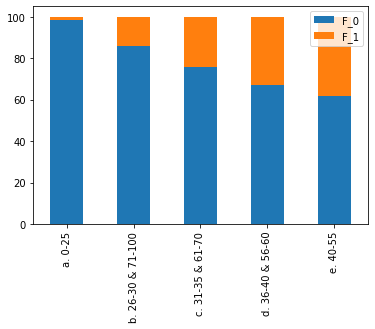

In [ ]:
#Age
#Counter Collection Data into list
Counter(data_0.age_bin.tolist())
Counter(data_1.age_bin.tolist())
#Storing the Age lists into Dictionaries
age1_dict = dict(Counter(data_1.age_bin.tolist()))
age0_dict = dict(Counter(data_0.age_bin.tolist()))
#Creating Age DataFrame
age_df = pd.DataFrame({"0":pd.Series(age0_dict),"1":pd.Series(age1_dict)})
age_df["Total"] = age_df["0"]+age_df["1"]
age_df["F_0"] = age_df["0"]/age_df["Total"]*100
age_df["F_1"] = age_df["1"]/age_df["Total"]*100
#Stacked Bar Graph
age_percent = age_df[["F_0", "F_1"]]
age_percent.plot(kind = "bar",stacked = True)
plt.show()

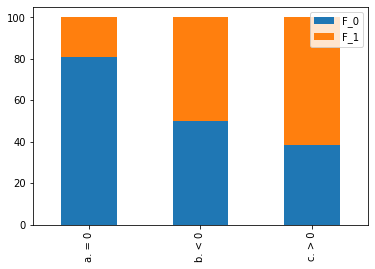

In [ ]:
#Capital_Gl
#Counter Collection Data into list
Counter(data_0.capital_gl_bin.tolist())
Counter(data_1.capital_gl_bin.tolist())
#Storing the Capital_Gl lists into Dictionaries
capital_gl1_dict = dict(Counter(data_1.capital_gl_bin.tolist()))
capital_gl0_dict = dict(Counter(data_0.capital_gl_bin.tolist()))
#Creating Capital_Gl DataFrame
capital_gl_df = pd.DataFrame({"0":pd.Series(capital_gl0_dict),"1":pd.Series(capital_gl1_dict)})
capital_gl_df["Total"] = capital_gl_df["0"]+capital_gl_df["1"]
capital_gl_df["F_0"] = capital_gl_df["0"]/capital_gl_df["Total"]*100
capital_gl_df["F_1"] = capital_gl_df["1"]/capital_gl_df["Total"]*100
#Stacked Bar Graph
capital_gl_percent = capital_gl_df[["F_0", "F_1"]]
capital_gl_percent.plot(kind = "bar",stacked = True)
plt.show()

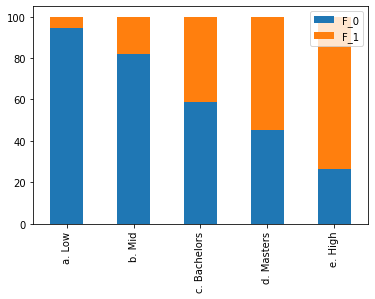

In [ ]:
#Education
#Counter Collection Data into list
Counter(data_0.education_bin.tolist())
Counter(data_1.education_bin.tolist())
#Storing the Education lists into Dictionaries
education1_dict = dict(Counter(data_1.education_bin.tolist()))
education0_dict = dict(Counter(data_0.education_bin.tolist()))
#Creating Education DataFrame
education_df = pd.DataFrame({"0":pd.Series(education0_dict),"1":pd.Series(education1_dict)})
education_df["Total"] = education_df["0"]+education_df["1"]
education_df["F_0"] = education_df["0"]/education_df["Total"]*100
education_df["F_1"] = education_df["1"]/education_df["Total"]*100
#Stacked Bar Graph
education_percent = education_df[["F_0", "F_1"]]
education_percent.plot(kind = "bar",stacked = True)
plt.show()

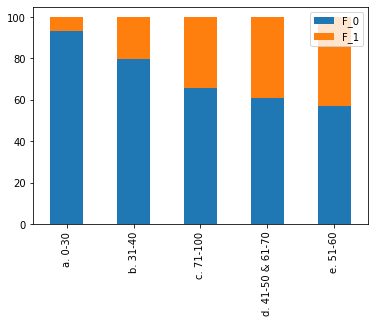

In [ ]:
#Hours Per Week
#Counter Collection Data into list
Counter(data_0.hours_per_week_bin.tolist())
Counter(data_1.hours_per_week_bin.tolist())
#Storing the hours_per_week lists into Dictionaries
hpw1_dict = dict(Counter(data_1.hours_per_week_bin.tolist()))
hpw0_dict = dict(Counter(data_0.hours_per_week_bin.tolist()))
#Creating hours_per_week DataFrame
hpw_df = pd.DataFrame({"0":pd.Series(hpw0_dict),"1":pd.Series(hpw1_dict)})
hpw_df["Total"] = hpw_df["0"]+hpw_df["1"]
hpw_df["F_0"] = hpw_df["0"]/hpw_df["Total"]*100
hpw_df["F_1"] = hpw_df["1"]/hpw_df["Total"]*100
#Stacked Bar Graph
hpw_percent = hpw_df[["F_0", "F_1"]]
hpw_percent.plot(kind = "bar",stacked = True)
plt.show()

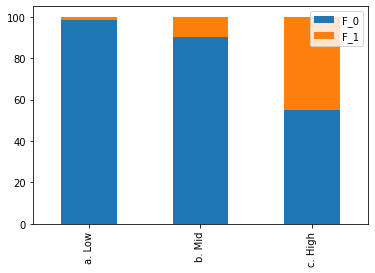

In [ ]:
#MSR
#Counter Collection Data into list
Counter(data_0.msr_bin.tolist())
Counter(data_1.msr_bin.tolist())
#Storing the MSR lists into Dictionaries
msr1_dict = dict(Counter(data_1.msr_bin.tolist()))
msr0_dict = dict(Counter(data_0.msr_bin.tolist()))
#Creating MSR DataFrame
msr_df = pd.DataFrame({"0":pd.Series(msr0_dict),"1":pd.Series(msr1_dict)})
msr_df["Total"] = msr_df["0"]+msr_df["1"]
msr_df["F_0"] = msr_df["0"]/msr_df["Total"]*100
msr_df["F_1"] = msr_df["1"]/msr_df["Total"]*100
#Stacked Bar Graph
msr_percent = msr_df[["F_0", "F_1"]]
msr_percent.plot(kind = "bar",stacked = True)
plt.show()

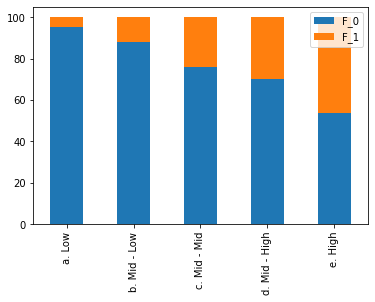

In [ ]:
#Hours Per Week
#Counter Collection Data into list
Counter(data_0.occupation_bin.tolist())
Counter(data_1.occupation_bin.tolist())
#Storing the occupation_bin lists into Dictionaries
occ1_dict = dict(Counter(data_1.occupation_bin.tolist()))
occ0_dict = dict(Counter(data_0.occupation_bin.tolist()))
#Creating hours_per_week DataFrame
occ_df = pd.DataFrame({"0":pd.Series(occ0_dict),"1":pd.Series(occ1_dict)})
occ_df["Total"] = occ_df["0"]+occ_df["1"]
occ_df["F_0"] = occ_df["0"]/occ_df["Total"]*100
occ_df["F_1"] = occ_df["1"]/occ_df["Total"]*100
#Stacked Bar Graph
occ_percent = occ_df[["F_0", "F_1"]]
occ_percent.plot(kind = "bar",stacked = True)
plt.show()

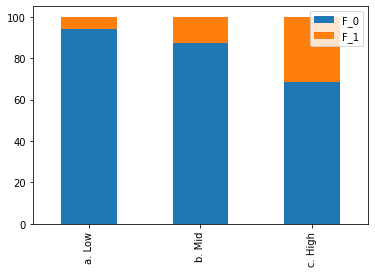

In [ ]:
#Race_Sex
#Counter Collection Data into list
Counter(data_0.race_sex_bin.tolist())
Counter(data_1.race_sex_bin.tolist())
#Storing the Race_Sex lists into Dictionaries
race_sex1_dict = dict(Counter(data_1.race_sex_bin.tolist()))
race_sex0_dict = dict(Counter(data_0.race_sex_bin.tolist()))
#Creating Race_Sex DataFrame
race_sex_df = pd.DataFrame({"0":pd.Series(race_sex0_dict).sort_index(),"1":pd.Series(race_sex1_dict).sort_index()})
race_sex_df["Total"] = race_sex_df["0"]+race_sex_df["1"]
race_sex_df["F_0"] = race_sex_df["0"]/race_sex_df["Total"]*100
race_sex_df["F_1"] = race_sex_df["1"]/race_sex_df["Total"]*100
#Stacked Bar Graph
race_sex_percent = race_sex_df[["F_0", "F_1"]]
race_sex_percent.plot(kind = "bar",stacked = True)
plt.show()

#**PART 2**

# 3. Decision Tree Classifier Model

In [ ]:
pip install --upgrade category_encoders

     |████████████████████████████████| 82 kB 310 kB/s 


In [ ]:
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder
from sklearn import metrics

#feature slection
#split dataset in features and target variable
feature_cols = ['age_bin','capital_gl_bin', 'education_bin','hours_per_week_bin',
                'msr_bin','occupation_bin','race_sex_bin']
X = data[feature_cols]# Feature
t = data.y #target variable

# splitting data
# split dataset into training set and test set
X_train, X_test, t_train, t_test = train_test_split(X,t,test_size = 0.3, random_state = 1) # 70% training and 30% testing

#building decision tree model
# create decision tree classifer object
dtree = DecisionTreeClassifier(max_depth =10, random_state = 101,
                              max_features = None, min_samples_leaf =15)
encoder = OrdinalEncoder(cols = ['age_bin','capital_gl_bin', 'education_bin','hours_per_week_bin',
                                 'msr_bin','occupation_bin','race_sex_bin'], 
                         handle_unknown = 'value', 
                         handle_missing = 'value').fit(X_train,t_train) #transform the type of variables from object to float
X_train = encoder.transform(X_train) #transform the tranning data set
X_test = encoder.transform(X_test)# transform the testing data set
       

# Train Decision Tree Claaifer
dtree = dtree.fit(X_train, t_train)


# predict the response for test dataset
y_pred = dtree.predict(X_test)

# Evaluating model
#model accuracy, how often is the classifier correct
print("Accuracy: ", metrics.accuracy_score(t_test, y_pred))

Accuracy:  0.8419436292909301


# 4. Decision Tree Generation Using Graphviz 

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.817234 to fit



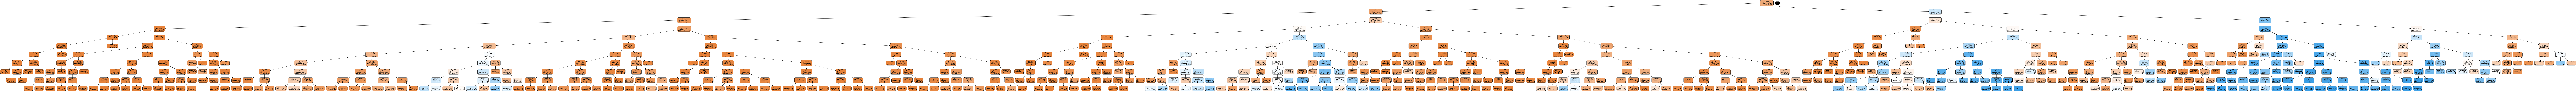

In [ ]:
from six import StringIO

#Creating Decision Tree Using GraphViz
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#5. Evaluation of Decision Tree Performance

[[10282   870]
 [ 1446  2055]]


None

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11152
           1       0.70      0.59      0.64      3501

    accuracy                           0.84     14653
   macro avg       0.79      0.75      0.77     14653
weighted avg       0.84      0.84      0.84     14653



None

Accuracy:  0.8419436292909301


None

auc is 0.7544811187375444


None

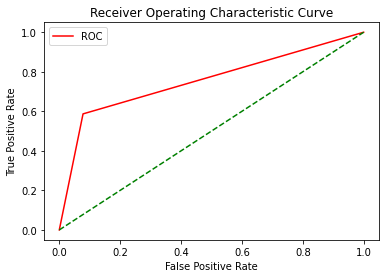

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

display(print(confusion_matrix(t_test, y_pred))) 
display(print(classification_report(t_test, y_pred))) 
display(print("Accuracy: ", metrics.accuracy_score(t_test, y_pred)))
def plot_roc_curve(false_positive_rate, true_positive_rate):
    plt.plot(false_positive_rate, true_positive_rate, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
false_positive_rate, true_positive_rate, thresholds = roc_curve(t_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)


display(print("auc is", auc(false_positive_rate, true_positive_rate)))
plot_roc_curve(false_positive_rate, true_positive_rate)

#**PART 3**

# 6. Tuning Decision Tree Performance

In [ ]:
#feature slection
#split dataset in features and target variable
feature_cols = ['age_bin','capital_gl_bin', 'education_bin','hours_per_week_bin',
                'msr_bin','occupation_bin','race_sex_bin']
X = data[feature_cols]# Feature
t = data.y #target variable

# splitting data
# split dataset into training set and test set
X_train, X_test, t_train, t_test = train_test_split(X,t,test_size = 0.3, random_state = 1) # 70% training and 30% testing

#building decision tree model
# create decision tree classifer object
dtree = DecisionTreeClassifier(criterion='entropy', min_samples_split=4, min_samples_leaf=11, max_depth=4)
encoder = OrdinalEncoder(cols = ['age_bin','capital_gl_bin', 'education_bin','hours_per_week_bin',
                                 'msr_bin','occupation_bin','race_sex_bin'], 
                         handle_unknown = 'value', 
                         handle_missing = 'value').fit(X_train,t_train) #transform the type of variables from object to float
X_train = encoder.transform(X_train) #transform the tranning data set
X_test = encoder.transform(X_test)# transform the testing data set
       

# Train Decision Tree Claaifer
dtree = dtree.fit(X_train, t_train)


# predict the response for test dataset
y_pred = dtree.predict(X_test)

# Evaluating model
#model accuracy, how often is the classifier correct
display(print("Accuracy: ", metrics.accuracy_score(t_test, y_pred)))
display(print(classification_report(t_test, y_pred))) 


Accuracy:  0.8219477240155599


None

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11152
           1       0.65      0.55      0.60      3501

    accuracy                           0.82     14653
   macro avg       0.76      0.73      0.74     14653
weighted avg       0.81      0.82      0.82     14653



None

In [ ]:
#Tree tuning performed using the following values

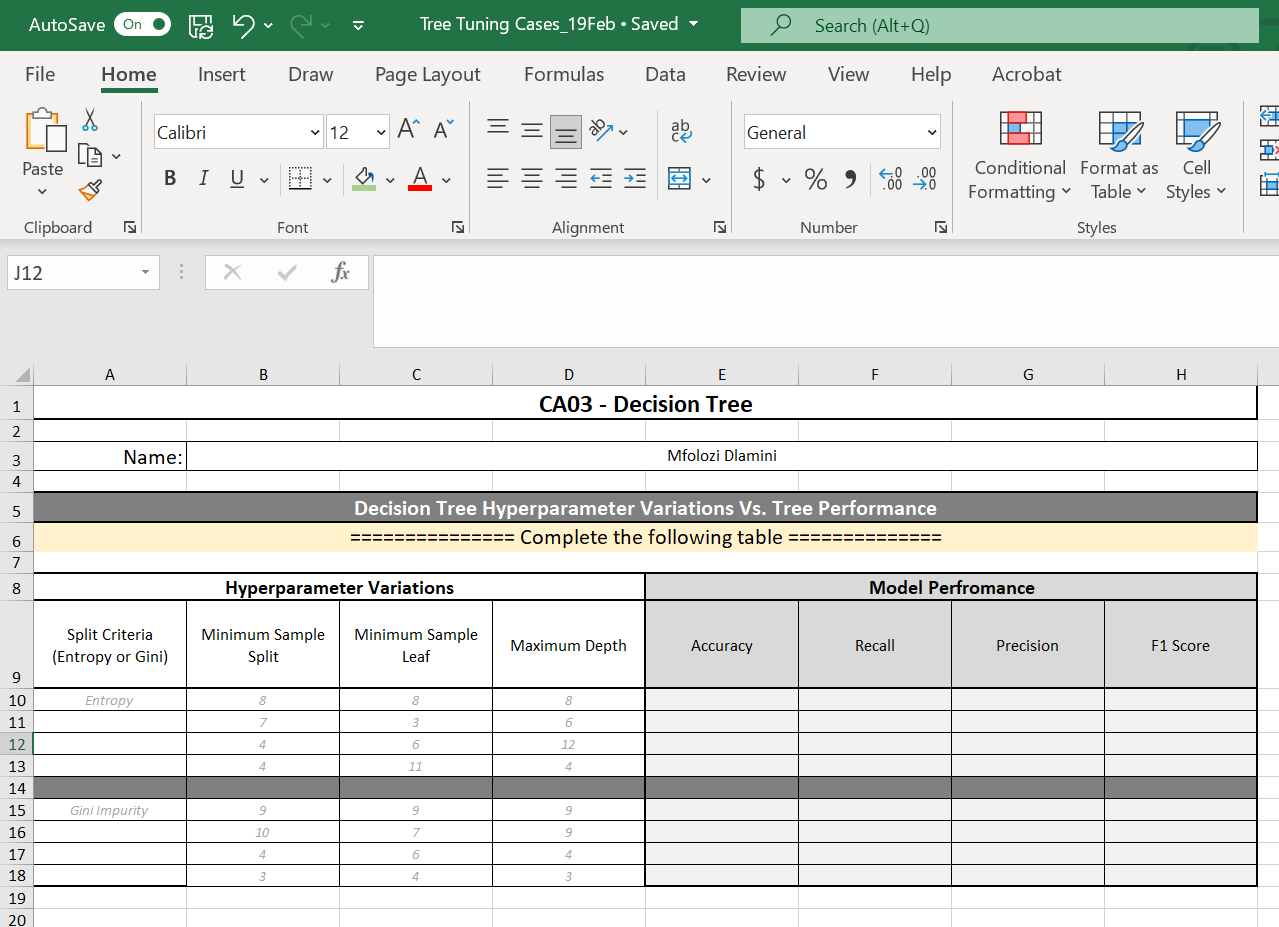

#7. Conclusion

In [ ]:
#See word doc for answers to the questions

#**PART 4**

# 8. Automation of Performance Tuning

In [ ]:
auto_test = "/content/auto_testing_mfolozi_20feb.csv"
auto_data = pd.read_csv(auto_test)

In [ ]:
auto_data

Split Criteria (Entropy or Gini)  Minimum Sample Split  ...  Precision  F1 Score
0                          entropy                     2  ...        NaN       NaN
1                          entropy                   250  ...        NaN       NaN
2                          entropy                    20  ...        NaN       NaN
3                          entropy                    12  ...        NaN       NaN
4                             gini                    21  ...        NaN       NaN
5                             gini                    22  ...        NaN       NaN
6                             gini                     9  ...        NaN       NaN
7                             gini                     3  ...        NaN       NaN

[8 rows x 8 columns]

In [ ]:
for i in range(len(auto_data)):
  if  auto_data['Split Criteria (Entropy or Gini)'][i] == 'entropy':

    dtree=DecisionTreeClassifier(criterion='entropy', min_samples_split=auto_data['Minimum Sample Split'][i],max_depth=auto_data['Maximum Depth'][i], min_samples_leaf=auto_data['Minimum Sample Leaf'][i])
    dtree.fit(X_train,t_train)
    t_pred=dtree.predict(X_test)
    print('Criteria: ENTROPY')
    accuracy=accuracy_score(t_test, t_pred)
    print("Accuracy:",accuracy)

    print(classification_report(t_test, t_pred))
    print('----------------------------------------------------------')
  else:

    dtree=DecisionTreeClassifier(min_samples_split=auto_data['Minimum Sample Split'][i],max_depth=auto_data['Maximum Depth'][i], min_samples_leaf=auto_data['Minimum Sample Leaf'][i])
    dtree.fit(X_train,t_train)
    t_pred=dtree.predict(X_test)
    print('Criteria: GINI')
    accuracy=accuracy_score(t_test, t_pred)
    print("Accuracy:",accuracy)

    print(classification_report(t_test, t_pred))
    print('----------------------------------------------------------')

Criteria: ENTROPY
Accuracy: 0.8401692486180304
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11152
           1       0.70      0.58      0.64      3501

    accuracy                           0.84     14653
   macro avg       0.79      0.75      0.77     14653
weighted avg       0.83      0.84      0.84     14653

----------------------------------------------------------
Criteria: ENTROPY
Accuracy: 0.841875383880434
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11152
           1       0.71      0.57      0.63      3501

    accuracy                           0.84     14653
   macro avg       0.79      0.75      0.77     14653
weighted avg       0.83      0.84      0.84     14653

----------------------------------------------------------
Criteria: ENTROPY
Accuracy: 0.8407834573124957
              precision    recall  f1-score   support

           0       0.87      0.93

#**PART 5**

# 9. Predicting Using "Trained" Decision Tree Model

In [ ]:


def forecast(age, capital_gl, education, hpw, msr, occupation,race_sex):
  df1 = pd.DataFrame()
  df1['age_bin'] = [age]
  df1['capital_gl_bin'] = [capital_gl]
  df1['education_bin'] = [education]
  df1['hours_per_week_bin'] = [hpw]
  df1['msr_bin'] = [msr]
  df1['occupation_bin']  = [occupation]
  df1['race_sex_bin'] = [race_sex]
 
  return dtree.predict(df1)

display(forecast(4,2,3,3,2,2,5))


array([1])

In [ ]:
a = ([[2,2,3,1,1,3,2]])
pre_result = dtree.predict(a)
display(print("Prediction is Class ", str(pre_result)))
probs = dtree.predict_proba(a)
display(print("The probability of the outcome of the prediction is",str(probs)))

Prediction is Class  [0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


None

The probability of the outcome of the prediction is [[0.91780822 0.08219178]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


None